In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import requests
from bs4 import BeautifulSoup, NavigableString, Tag, Comment
from konlpy.corpus import kolaw  
from konlpy.tag import Twitter
import nltk
from wordcloud import WordCloud
from PIL import Image

In [25]:
req=requests.get('https://www.moe.go.kr/mnstrBoardView.do?boardID=430&boardSeq=80047&lev=0')

In [26]:
speech = req.text

In [27]:
soup = BeautifulSoup(speech, 'html.parser')

In [31]:
sp = soup.select('#container > div.contentWrap > div > section > div.ministerView > div.imageFrame')

In [32]:
type(sp)   #list

list

In [43]:
sp_t=sp[0].text
sp_t

'\n◈ 행사 : 2020학년도 신학기 개학 연기 관련 브리핑◈ 일시 : 2020. 3. 17.(화), 14:00-◈ 장소 : 정부 서울청사\xa0부총리 겸 교육부 장관 유은혜입니다. \xa0존경하는 국민 여러분,  그리고 현장에서 수고하시는 교육가족 여러분,  코로나19 감염증 위기 속에서도 사회적 거리두기에 적극적으로 참여해 주시고 성숙한 시민의식을 보여주고 계시는 국민 여러분께 진심으로 감사드린다는 인사부터 드리겠습니다.\xa0학교 개학이 계속 연기되는 유례없는 상황 속에서 국민 여러분께 긴급돌봄을 제공하고 학교 방역과 새로운 원격수업을 준비하는 등 교육 현장에서 보이지 않게 애쓰고 계시는 정말 많은 분이 계십니다. 진심으로 여러분들의 수고와 노력에 감사드립니다. \xa0또한, 자녀의 안전을 지키고자 많은 것을 감내하고 계시는학부모 여러분, 정말 고맙습니다. 정부는 비상한 각오로 지금의 난국을 극복해 나가겠습니다. \xa0존경하는 국민 여러분, 전국적인 확진환자 숫자가 다소 줄어들고는 있지만 밀집장소에서의 소규모 집단감염 위험이 여전히 높아서 긴장의 끈을 놓을 수가 없습니다. \xa0특히, 전국 확진환자 숫자에 비하면 매우 낮은 비율이긴 하지만  19세 이하 미성년자의 누적 확진자 숫자가 3월 7일 379명에서 14일 505명으로 증가한 상황을 교육부는 예의주시하고 있습니다. \xa0또한, 질병관리본부 및 전문가들이 제시한 학교는 지역사회 주요 감염원이 될 우려가 있으며 학생으로 시작해서 가정을 거쳐 사회적 전파가 될 확률이 높다는 의견을 저희 교육부는 존중합니다. \xa0이에 추가적인 개학 연기를 진지하게 검토하였으며,  오늘 중대본회의를 거쳐 최종 결정하였습니다. \xa0정부는 전국의 유치원과 어린이집, 초중고등학교와 특수학교의 개학일을 당초 3월 23일에서 4월 6일로 2주 더 연기하겠습니다. 이러한 결정은 우리 아이들의 건강과 안전을 최우선으로 판단한 것입니다. 다만, 감염증의 추세를 예의주시하면서 교육부는 휴업 연장여부를 포함한 개학의 시기와 방

In [44]:
wc = WordCloud()
wc_model = wc.generate(sp_t)

In [45]:
# wc_model.words_    # 단어 상대적 빈도수치 
# wc_model.to_array() # 픽셀값
wc_model.to_array().shape #(200, 400, 3)  행200개, 열 400개 출력

(200, 400, 3)

In [46]:
t = Twitter()

In [60]:
ko_tokens = t.nouns(sp_t)
ko_tokens[:300]     #단어들 뽑아서 진행
one_word_token = []
for token in ko_tokens:
    if len(token) == 1 and token not in one_word_token:
        one_word_token.append(token)
        # print(token)
# one_word_token

In [56]:
# stop_words = ['제','월','일','조','수','때','그','이','바','및','안']
# ko_tokens2 = [ token for token in ko_tokens if token not in stop_words] 

In [57]:
tmp = np.unique(ko_tokens, return_counts=True)
tmp_df = pd.DataFrame({'word' : tmp[0], 'cnt': tmp[1]})
tmp_df.sort_values(by=['cnt'], ascending=False).head()

,word,cnt
11,개학,16
288,학교,15
163,여러분,12
41,교육부,10
166,연기,9


In [67]:
ko_model = nltk.Text(ko_tokens)
_model = nltk.Text(ko_tokens)
ko_data = ko_model.vocab().most_common(300)
ko_data[:10]

[('개학', 16),
 ('학교', 15),
 ('여러분', 12),
 ('교육부', 10),
 ('연기', 9),
 ('상황', 9),
 ('학생', 9),
 ('국민', 8),
 ('방역', 8),
 ('준비', 7)]

In [68]:
from PIL import Image

In [90]:
school = Image.open('data-files/school1.jpg')   # 사진은 2가지 색만 있는것으로만 가능
# school
school_array = np.array(school)
school_array.shape

(225, 225, 3)

In [95]:
ko_data_dict = dict(ko_data) # {단어: 빈도수}  dict으로 변경
wc = WordCloud(font_path=r"D:\yun\workspace\Font\NanumGothic.ttf", 
                mask=school_array, background_color='white')
wc_model2 = wc.generate_from_frequencies(ko_data_dict)

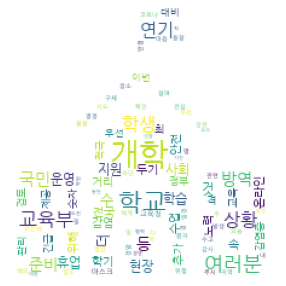

In [100]:
plt.figure(figsize=(5, 5))
plt.imshow(wc_model2)
plt.axis('off')
plt.show()